# Introduction
The United States is made up of 50 individual states that vary greatly in size. Rhode Island ranks as the smallest regarding the land area. In this project, we'll analyze a dataset of traffic stops in Rhode Island that was collected by [the Stanford Open Policing Project](https://openpolicing.stanford.edu/data/) and analyze the police behavior from the following perspectives:
* Analyze impact of gender on police behavior<br>
Do the genders commit different violations? Does the gender of a driver have an impact on police behavior during a traffic stop? We will explore those questions while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

* Analyze trends<br>
Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? We will answer these and other questions by analyzing the dataset visually, since plots can help us to understand trends in a way that examining the raw data cannot.

* Analyzing the effect of weather on policing<br>
We will use a second dataset to explore the impact of weather conditions on police behavior during traffic stops. We will practice merging and reshaping datasets, assessing whether a data source is trustworthy, working with categorical data, and other advanced skills.

# Examing the dataset
Before beginning our analysis, it's important to examine the dataset. We'll read the dataset into pandas, examine the first few rows, and then count the number of missing values. We will practice cleaning messy data (fixing data types, handling missing values, and dropping columns and rows), creating visualizations, combining and reshaping datasets, and manipulating time series data. 



In [1]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri=pd.read_csv('/Users/phyhouhou/RI-clean.csv')
ri.head()

#https://www.dataquest.io/blog/pandas-big-data/

/Users/phyhouhou/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [2]:
# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

              id state   stop_date stop_time location_raw  county_name  \
0  RI-2005-00001    RI  2005-01-02     01:55      Zone K1          NaN   
1  RI-2005-00002    RI  2005-01-02     20:30      Zone X4          NaN   
2  RI-2005-00003    RI  2005-01-04     11:30      Zone X1          NaN   
3  RI-2005-00004    RI  2005-01-04     12:55      Zone X4          NaN   
4  RI-2005-00005    RI  2005-01-06     01:30      Zone X4          NaN   

   county_fips  fine_grained_location police_department driver_gender  \
0          NaN                    NaN               600             M   
1          NaN                    NaN               500             M   
2          NaN                    NaN                 0           NaN   
3          NaN                    NaN               500             M   
4          NaN                    NaN               500             M   

     ...     search_conducted  search_type_raw search_type contraband_found  \
0    ...                False        

It looks like most of the columns have at least some missing values. We'll figure out how to handle these values in the next exercise!

# Dropping columns
Often, a DataFrame will contain columns that are not useful to our analysis. Such columns should be dropped from the DataFrame, to make it easier for us to focus on the remaining columns.

In this exercise, we'll drop the 'county_name' column because it only contains missing values, and we'll drop the state column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

In [3]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64
(509681, 26)
(509681, 24)


# Dropping rows
When we know that a specific column will be critical to our analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

In this project, the 'driver_gender' column will be critical to our analyses. Because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset.

In [4]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

id                            0
stop_date                    10
stop_time                    10
location_raw                  0
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64
id                            0
stop_date                     0
stop_time                     0
location_raw                  0
county_fips              480584
fine_grained_location    480584
police_department          

 We dropped around 5,000 rows, which is a small fraction of the dataset, and now only one column remains with any missing values.

# Using proper data types
## Fixing a data type
We saw in the previous exercise that the 'is_arrested' column currently has the object data type. In this exercise, we'll change the data type to 'bool', which is the most suitable type for a column containing True and False values.

Fixing the data type will enable us to use mathematical operations on the 'is_arrested' column that would not be possible otherwise.

It's best to fix these data type problems early, before we begin our analysis.

In [5]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' (again)
print(ri['is_arrested'].dtype)

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object
object
bool


# Combining object columns
Currently, the date and time of each traffic stop are stored in separate object columns: 'stop_date' and 'stop_time'.

We'll combine these two columns into a single column, and then convert it to datetime format. This will enable convenient date-based attributes that we'll use later in the course.

In [6]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time,sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

id                               object
stop_date                        object
stop_time                        object
location_raw                     object
county_fips                     float64
fine_grained_location           float64
police_department                object
driver_gender                    object
driver_age_raw                  float64
driver_age                      float64
driver_race_raw                  object
driver_race                      object
violation_raw                    object
violation                        object
search_conducted                 object
search_type_raw                  object
search_type                      object
contraband_found                   bool
stop_outcome                     object
is_arrested                        bool
stop_duration                    object
out_of_state                     object
drugs_related_stop                 bool
district                         object
stop_datetime            datetime64[ns]


## changing data type from object to categoricy
* category type stores the data more efficiently
* allows you to specify a logical order for the categories

In [34]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [35]:
ri.stop_duration.memory_usage(deep=True)

56112866

In [38]:
cats=['1', '2','0-15 Min', '16-30 Min', '30+ Min'] 
ri.stop_duration=ri.stop_duration.astype('category', ordered=True, categories=cats)
ri.stop_duration.memory_usage(deep=True)

/Users/phyhouhou/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


25297263

## using ordered categories

Because of the ordering, now we can use the comparison operators within this column.


In addition, pandas will automatically sort ordered cateories logically rather than alphabetically, which can make the results of calculations easier to understand.

In [41]:
ri[ri.stop_duration>'16-30 Min'].shape

ri.stop_duration.head()

stop_datetime
2005-01-02 01:55:00     0-15 Min
2005-01-02 20:30:00    16-30 Min
2005-01-04 12:55:00     0-15 Min
2005-01-06 01:30:00     0-15 Min
2005-01-12 08:05:00      30+ Min
Name: stop_duration, dtype: category
Categories (5, object): [1 < 2 < 0-15 Min < 16-30 Min < 30+ Min]

In [42]:
ri.groupby('stop_duration').is_arrested.mean()

stop_duration
1            0.000000
2            1.000000
0-15 Min     0.012996
16-30 Min    0.092309
30+ Min      0.257325
Name: is_arrested, dtype: float64

# Setting the index
Set the stop_datetime column as the DataFrame's index. By replacing the default index with a DatetimeIndex, we'll make it easier to analyze the dataset by date and time, which will come in handy later!

In [7]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)
Index(['id', 'stop_date', 'stop_time', 'location_raw', 'county_fips',
       'fine_grained_location', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_r

Now that we have cleaned the dataset, we can begin analyzing it in the next section.

# Do the genders commit different violations?
Examining traffic violations<br>
Before comparing the violations being committed by each gender, you should examine the violations committed by all drivers to get a baseline understanding of the data.

We'll count the unique values in the violation column, and then separately express those counts as proportions.



In [8]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64
Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64


Interesting! More than half of all violations are for speeding, followed by other moving violations and equipment violations.

# Comparing violations by gender
The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

we'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

In [9]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender=='F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender=='M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64
Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64


About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

# Does gender affect who gets a ticket for speeding?
Comparing speeding outcomes by gender<br>
When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can we find evidence of this in the dataset?

First, we'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, we'll use the 'stop_outcome' column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

In [10]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=='F')&(ri.violation=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=='M')&(ri.violation=='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64
Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64


Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

# Does gender affect whose vehicle is searched?

Calculating the search rate<br>
During a traffic stop, the police officer sometimes conducts a search of the vehicle. We'll calculate the percentage of all stops that result in a vehicle search, also known as the search rate. Note that mean of Boolen series represent the percentage of True values.

In [11]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

object
False    0.963041
True     0.036959
Name: search_conducted, dtype: float64
0.036959199640437465


It looks like the search rate is about 3.8%. Next, you'll examine whether the search rate varies by driver gender.

# Comparing search rates by gender
We'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

First, we'll filter the DataFrame by gender and calculate the search rate for each group separately. Then, we'll perform the same calculation for both genders at once using a .groupby().

In [17]:
print(ri.search_conducted.dtype)
ri['search_conducted']=ri.search_conducted.astype('bool')
print(ri.search_conducted.dtype)



bool
bool


In [18]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender=='F'].search_conducted.mean())

# Calculate the search rate for male drivers
print(ri[ri.driver_gender=='M'].search_conducted.mean())

# Calculate the search rate for both groups simultaneously
print(ri.groupby(['driver_gender']).search_conducted.mean())


0.018751239152648355
0.04379217389811301
driver_gender
F    0.018751
M    0.043792
Name: search_conducted, dtype: float64


Wow! Male drivers are searched more than twice as often as female drivers. Why might this be?

# Adding a second factor to the analysis
Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, we might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

We can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

In [19]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())


driver_gender  violation          
F              Equipment              0.040245
               Moving violation       0.038021
               Other                  0.045898
               Registration/plates    0.054700
               Seat belt              0.017746
               Speeding               0.007738
M              Equipment              0.070916
               Moving violation       0.059156
               Other                  0.046120
               Registration/plates    0.103589
               Seat belt              0.031705
               Speeding               0.026630
Name: search_conducted, dtype: float64
violation            driver_gender
Equipment            F                0.040245
                     M                0.070916
Moving violation     F                0.038021
                     M                0.059156
Other                F                0.045898
                     M                0.046120
Registration/plates  F                0.05470

For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

# Does gender affect who is frisked during a search?

Counting protective frisks
During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

Next we'll first check to see how many times "Protective Frisk" was the only search type. Then, we'll use a string method to locate all instances in which the driver was frisked.


In [21]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

It looks like there were 303 drivers who were frisked. Next, you'll examine whether gender affects who is frisked.

# Comparing frisk rates by gender
We'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.


In [22]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted==True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.08996734601959239
driver_gender
F    0.066694
M    0.093707
Name: frisk, dtype: float64


Interesting! The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

# Does time of day affect arrest rate?

Calculating the hourly arrest rate<br>
When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, we'll calculate the arrest rate across all stops. Then, we'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

0 = midnight<br>
12 = noon<br>
23 = 11 PM<br>


for a column: df.date_time.dt.hour<br>
for an index of date time: df.index.hour<br>

In [23]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.03454755048024903
stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64


Next we'll plot the data so that you can visually examine the arrest rate trends. We'll create a line plot from the 'hourly_arrest_rate' object. A line plot is appropriate in this case because we're showing how a quantity changes over time. This plot should help to spot some trends that may not have been obvious when examining the raw numbers!

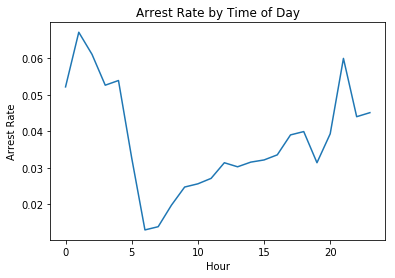

In [25]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()


The arrest rate has a significant spike overnight, and then dips in the early morning hours.

# Are drug-related stops on the rise?

Plotting drug-related stops<br>
In a small portion of traffic stops, drugs are found in the vehicle during a search. We'll assess whether these drug-related stops are becoming more common over time.

The Boolean column 'drugs_related_stop' indicates whether drugs were found during a given stop. We'll calculate the annual drug rate by resampling this column, and then use a line plot to visualize how the rate has changed over time. Note resampling is when we change freq of our time series observations. 



stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


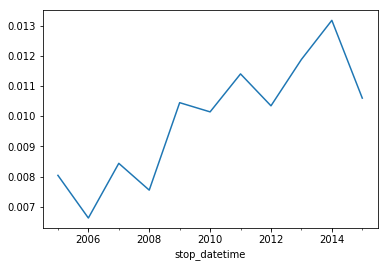

In [26]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

Interesting! The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

# Comparing drug and search rates
As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

We can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then we'll see both rates increasing over time.

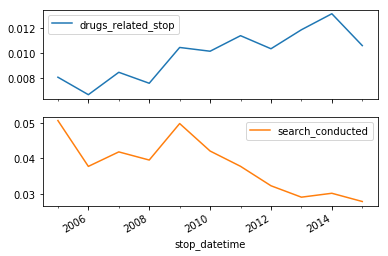

In [27]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis=1)

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

Wow! The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

# What violations are caught in each district?

Tallying violations by district<br>
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

We'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, we'll filter the table to focus on the "K" zones, which we'll examine further in the next.



In [28]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district,ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district,ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1         3786              7127   1501                  628          1   
Zone K2        11285             16440   5103                 4056       2897   
Zone K3        12959             16218   3926                 3871       3660   
Zone X1         1725              3711    752                  192        451   
Zone X3        11520             17178   4069                 3532       4445   
Zone X4        19975             29554   8865                 7551       4870   

violation  Speeding  
district             
Zone K1       33067  
Zone K2       57500  
Zone K3       68234  
Zone X1        6393  
Zone X3       48687  
Zone X4       54855  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

# Plotting violations by district
Now that we've created a frequency table focused on the "K" zones, we'll visualize the data to help compare what violations are being caught in each zone.

First let's create a bar plot, which is an appropriate plot type since we're comparing categorical data. Then we'll create a stacked bar plot in order to get a slightly different look at the data. Which plot is more insightful?

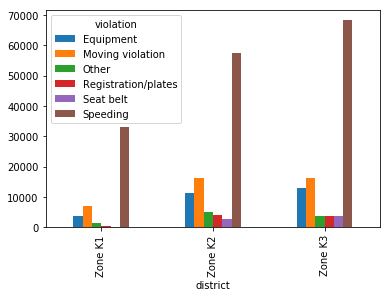

In [29]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

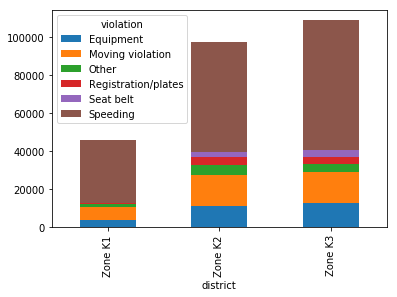

In [30]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar',stacked=True)

# Display the plot
plt.show()

Interesting! The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

# How long might you be stopped for a violation?

Converting stop durations to numbers<br>
In the traffic stops dataset, the 'stop_duration' column tells us approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can we make this data easier to analyze? We'll convert the stop durations to integers. Because the precise durations are not available, we will have to estimate the numbers using reasonable values:

Convert '0-15 Min' to 8<br>
Convert '16-30 Min' to 23<br>
Convert '30+ Min' to 45<br>

In [31]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min' '2' '1']
[ 8. 23. 45. nan]


# Plotting stop length
If you were stopped for a particular violation, how long might you expect to be detained?

We'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, we use 'violation_raw' since it contains more detailed descriptions of the violations.

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64


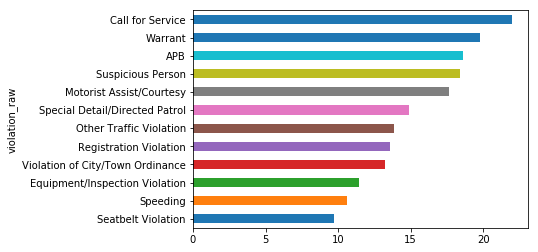

In [32]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

# Exploring the weather dataset
We will work on a new dataset to help determine if weather  conditions have an impact on police behavior.
Our hypothesis is that weather impact police office in traffic stops.

We will examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First We'll print the summary statistics, and then visualize the data using a box plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

In [ ]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather=pd.read_csv('weather.csv')

# Describe the temperature columns
print(weather[['TMIN','TAVG','TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN','TAVG','TMAX']].plot(kind='box')

# Display the plot
plt.show()

![png](boxvis.png)

The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

Next we'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?

In [ ]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF']=weather.TMAX-weather.TMIN

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist',bins=20)

# Display the plot
plt.show()

![png](histvis.png)


The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

# Counting bad weather conditions
The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain"
For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

We'll quantify "how bad" the weather was each day by counting the number of 1 values in each row.

In [ ]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')

# Display the plot
plt.show()

![png](whistvis.png)

 It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

# Rating the weather conditions
In the previous section, we counted the number of bad weather conditions each day. Next we'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

Convert 0 to 'good'<br>
Convert 1 through 4 to 'bad'<br>
Convert 5 through 9 to 'worse'<br>

In [ ]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

This rating system should make the weather condition data easier to understand.

# Changing the data type to category
Since the rating column only has a few possible values, we'll change its data type to category in order to store the data more efficiently. We'll also specify a logical order for the categories, which will be useful for future analysis.

In [ ]:
# Create a list of weather ratings in logical order
cats=['good','bad','worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category',ordered=True,categories=cats)

# Examine the head of 'rating'
print(weather.rating.head())


# Merging datasets
We'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:
With the ri DataFrame, we move the 'stop_datetime' index to a column since the index will be lost during the merge.
With the weather DataFrame, we select the 'DATE' and 'rating' columns and put them in a new DataFrame.

In [ ]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating=weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

# Merging the DataFrames
We merge the ri and weather_rating DataFrames into a new DataFrame, ri_weather. The DataFrames will be joined using the 'stop_date' column from ri and the 'DATE'column from weather_rating. Thankfully the date formatting matches exactly, which is not always the case! Once the merge is complete, we set 'stop_datetime' as the index, which is the column we saved in the previous exercise.

In [ ]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

# Does weather affect the arrest rate?


In [45]:
# examine a multi-indexed series
search_rate=ri.groupby(['violation','driver_gender']).search_conducted.mean()
search_rate

violation            driver_gender
Equipment            F                0.040245
                     M                0.070916
Moving violation     F                0.038021
                     M                0.059156
Other                F                0.045898
                     M                0.046120
Registration/plates  F                0.054700
                     M                0.103589
Seat belt            F                0.017746
                     M                0.031705
Speeding             F                0.007738
                     M                0.026630
Name: search_conducted, dtype: float64

In [46]:
#working with multi-index series is actually similar to working with a data frame
#we can think outer index level as the rows; inner index level as the data frame columns
search_rate.loc['Equipment']

driver_gender
F    0.040245
M    0.070916
Name: search_conducted, dtype: float64

In [47]:
#convert a multi-index series to a dataframe
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.040245,0.070916
Moving violation,0.038021,0.059156
Other,0.045898,0.046120
Registration/plates,0.054700,0.103589
Seat belt,0.017746,0.031705
Speeding,0.007738,0.026630


In [48]:
#create this data frame without using group by and unstack

ri.pivot_table(index='violation',columns='driver_gender',values='search_conducted')
#mean of search_condected is the values. mean is the default funciton for aggreaaation. We can choose other functions.

driver_gender,F,M
violation,,
Equipment,0.040245,0.070916
Moving violation,0.038021,0.059156
Other,0.045898,0.046120
Registration/plates,0.054700,0.103589
Seat belt,0.017746,0.031705
Speeding,0.007738,0.026630


Comparing arrest rates by weather rating<br>

Do police officers arrest drivers more often when the weather is bad? Let's find out below!

First, we calculate the overall arrest rate. Then, we'll calculate the arrest rate for each of the weather ratings we previously assigned. Finally, we'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate. Since we previously defined a logical order for the weather categories, good < bad < worse, they will be sorted that way in the results.

In [ ]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())



rating
    good     0.033715
    bad      0.036261
    worse    0.041667
    Name: is_arrested, dtype: float64

In [ ]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation','rating']).is_arrested.mean())



violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64



Wow! The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

# Appendix

**Reference**<br>

This project is from a course from [DataCamp](https://www.datacamp.com/courses/analyzing-police-activity-with-pandas).

**Selecting from a multi-indexed Series**<br>
The output of a single .groupby() operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

The outer index level is like the DataFrame rows.
The inner index level is like the DataFrame columns.
Let's practice accessing data from a multi-indexed Series using the .loc[] accessor.

In [ ]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation']['bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
    good     0.013405
    bad      0.013314
    worse    0.016886
    Name: is_arrested, dtype: float64
#The .loc[] accessor is a powerful and flexible tool for data selection.

**Reshaping the arrest rate data**
We can reshape the 'arrest_rate' Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods.

We can create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!

In [ ]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886